In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("DengueRisk_(Scaling  normalization (StandardScaler)].csv")

# Preview dataset
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (4366, 35)


,YearWeek,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,daylight_duration,wind_speed_max,et0_evapotranspiration,District_anuradhapura,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,-0.959489,-0.849928,-0.423251,0.339925,-0.745342,-1.376816,-0.014035,-1.440448,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,-0.715774,-0.502382,-0.337936,-0.646809,0.438579,-1.570933,-0.174945,-0.804776,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,-2.384842,-2.240112,-2.001570,1.073927,-1.401267,-1.325196,-1.124318,-1.914984,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,-0.543415,-1.093210,0.173951,0.778175,-0.009423,-1.454355,0.339969,-1.189135,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,-0.091161,0.227465,0.045979,-0.275776,0.185420,-1.312302,0.179058,-0.030144,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
# Assume 'risk_level' is your target column
X = df.drop(columns=["risk_level"], errors="ignore")
y = df["risk_level"] if "risk_level" in df.columns else None

print("Features shape:", X.shape)
if y is not None:
    print("Target distribution:\n", y.value_counts())

Features shape: (4366, 34)
Target distribution:
 risk_level
0    3183
1    1183
Name: count, dtype: int64


In [3]:
# Drop the 'yearweek' column
df = df.drop(columns=["YearWeek"])

print("✅ Dropped 'yearweek' column")
print("Remaining columns:", df.columns.tolist())

✅ Dropped 'yearweek' column
Remaining columns: ['temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration', 'District_anuradhapura', 'District_badulla', 'District_batticaloa', 'District_colombo', 'District_galle', 'District_gampaha', 'District_hambantota', 'District_jaffna', 'District_kalmunai', 'District_kalutara', 'District_kandy', 'District_kegalle', 'District_kilinochchi', 'District_kurunegala', 'District_mannar', 'District_matale', 'District_matara', 'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam', 'District_ratnapura', 'District_trincomalee', 'District_vavuniya', 'risk_level']


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after scaling:", X_scaled.shape)

Shape after scaling: (4366, 33)


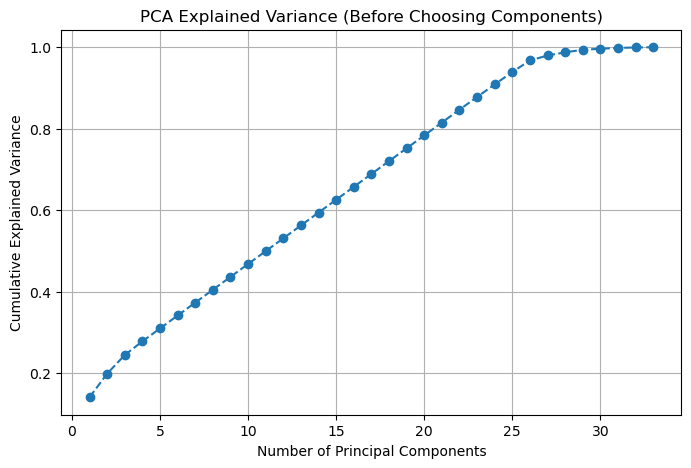

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance (Before Choosing Components)")
plt.grid(True)
plt.show()


In [7]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)

Shape after PCA: (4366, 26)


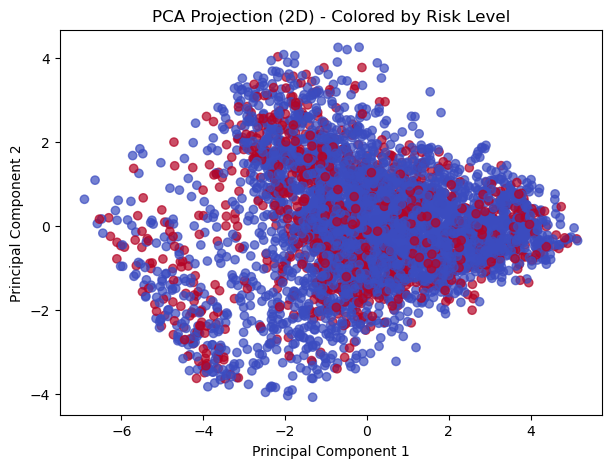

In [8]:
if y is not None:
    plt.figure(figsize=(7,5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Projection (2D) - Colored by Risk Level")
    plt.show()

In [9]:
# Convert to DataFrame
pca_cols = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)

# Add target column back
if y is not None:
    df_pca["risk_level"] = y.values

# Save new CSV
df_pca.to_csv("DengueRisk_Final_processed_dataset.csv", index=False)

print("✅ Saved PCA dataset as DengueRisk_PCA.csv")
print("Final shape:", df_pca.shape)

✅ Saved PCA dataset as DengueRisk_PCA.csv
Final shape: (4366, 27)


In [ ]:
# --- Libraries (safe to re-run) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance

plt.rcParams['figure.dpi'] = 110
plt.rcParams['axes.grid'] = True